In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from mmq import metodo_minimos_quadrados

In [ ]:
#CRIAR TABELA LIGANTES, A TABELA ABAIXO NA VERDADE É A TABELA DF_DURACOES

In [7]:
df_tabela_ligantes = pd.read_excel(
    os.path.join("data", "Base_real_para_attentus.xlsx")
)

df_tabela_ligantes

,Application,ApplicationVersion,DnaAutomacao,AutomatedCall,Calldate,Plataforma,Solucao,CalledVDN,CallerClass,ChannelType,...,RechCanal48H_ANI,RechCanal6D_ANI,RecallRechCanal24h_CPF_CNPJ,RecallRechCanalDia_CPF_CNPJ,RecentCallsSamePedidoToday,RecentCallsSamePedido24Horas,RecentCallsSamePedido48Horas,RecentCallsSamePedido6Dias,AfterHour,IdDivision
0,Genesys Cloud,2.0,0,0,2025-07-23 00:02:21,Pure Cloud,3,NaN,NaN,1,...,NaN,1,1.0,NaN,0,NaN,NaN,0,0,5
1,Genesys Cloud,2.0,0|28,28,2025-07-23 00:03:40,Pure Cloud,3,NaN,NaN,1,...,NaN,0,NaN,NaN,0,NaN,NaN,0,1,5
2,Genesys Cloud,2.0,0,0,2025-07-23 00:04:48,Pure Cloud,3,NaN,NaN,1,...,NaN,1,NaN,NaN,0,NaN,NaN,0,1,5
3,Genesys Cloud,2.0,36,36,2025-07-23 00:05:39,Pure Cloud,3,NaN,NaN,1,...,NaN,1,1.0,NaN,0,NaN,NaN,1,0,5
4,Genesys Cloud,2.0,0|40,40,2025-07-23 00:06:31,Pure Cloud,3,NaN,NaN,1,...,NaN,1,1.0,1.0,0,NaN,NaN,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18078,Genesys Cloud,2.0,0,0,2025-07-23 23:38:16,Pure Cloud,3,NaN,NaN,1,...,NaN,1,1.0,1.0,1,NaN,NaN,1,0,5
18079,Genesys Cloud,2.0,0,0,2025-07-23 23:47:01,Pure Cloud,3,NaN,NaN,1,...,NaN,0,NaN,NaN,0,NaN,NaN,0,0,5
18080,Genesys Cloud,2.0,0|11,11,2025-07-23 23:47:01,Pure Cloud,3,NaN,NaN,1,...,NaN,1,1.0,1.0,1,NaN,NaN,1,0,5
18081,Genesys Cloud,2.0,NaN,0,2025-07-23 23:55:08,Pure Cloud,3,NaN,NaN,1,...,NaN,0,NaN,NaN,0,NaN,NaN,0,0,5


In [9]:
df_tabela_ligantes['Hora'] = df_tabela_ligantes['Calldate'].dt.time

df_tabela_ligantes

,Application,ApplicationVersion,DnaAutomacao,AutomatedCall,Calldate,Plataforma,Solucao,CalledVDN,CallerClass,ChannelType,...,RechCanal6D_ANI,RecallRechCanal24h_CPF_CNPJ,RecallRechCanalDia_CPF_CNPJ,RecentCallsSamePedidoToday,RecentCallsSamePedido24Horas,RecentCallsSamePedido48Horas,RecentCallsSamePedido6Dias,AfterHour,IdDivision,Hora
0,Genesys Cloud,2.0,0,0,2025-07-23 00:02:21,Pure Cloud,3,NaN,NaN,1,...,1,1.0,NaN,0,NaN,NaN,0,0,5,00:02:21
1,Genesys Cloud,2.0,0|28,28,2025-07-23 00:03:40,Pure Cloud,3,NaN,NaN,1,...,0,NaN,NaN,0,NaN,NaN,0,1,5,00:03:40
2,Genesys Cloud,2.0,0,0,2025-07-23 00:04:48,Pure Cloud,3,NaN,NaN,1,...,1,NaN,NaN,0,NaN,NaN,0,1,5,00:04:48
3,Genesys Cloud,2.0,36,36,2025-07-23 00:05:39,Pure Cloud,3,NaN,NaN,1,...,1,1.0,NaN,0,NaN,NaN,1,0,5,00:05:39
4,Genesys Cloud,2.0,0|40,40,2025-07-23 00:06:31,Pure Cloud,3,NaN,NaN,1,...,1,1.0,1.0,0,NaN,NaN,1,0,5,00:06:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18078,Genesys Cloud,2.0,0,0,2025-07-23 23:38:16,Pure Cloud,3,NaN,NaN,1,...,1,1.0,1.0,1,NaN,NaN,1,0,5,23:38:16
18079,Genesys Cloud,2.0,0,0,2025-07-23 23:47:01,Pure Cloud,3,NaN,NaN,1,...,0,NaN,NaN,0,NaN,NaN,0,0,5,23:47:01
18080,Genesys Cloud,2.0,0|11,11,2025-07-23 23:47:01,Pure Cloud,3,NaN,NaN,1,...,1,1.0,1.0,1,NaN,NaN,1,0,5,23:47:01
18081,Genesys Cloud,2.0,NaN,0,2025-07-23 23:55:08,Pure Cloud,3,NaN,NaN,1,...,0,NaN,NaN,0,NaN,NaN,0,0,5,23:55:08


In [10]:
# 2. Define os intervalos e rótulos
bins = [0, 50, 100, 150, 200, 250, 300, float('inf')]
labels = [0, 50, 100, 150, 200, 250, 300]

# 3. Cria a coluna 'duracao_conexao' com os intervalos
df_tabela_ligantes['duracao_conexao'] = pd.cut(df_tabela_ligantes['DurationIVR'], bins=bins, labels=labels, right=True)

# 4. Conta as ligações por intervalo e garante todos os rótulos mesmo que com zero
grouped = df_tabela_ligantes['duracao_conexao'].value_counts().reindex(labels, fill_value=0)

# 5. Calcula total de ligações
total = grouped.sum()

# 6. Cria o novo DataFrame com as colunas solicitadas
df_duracoes = pd.DataFrame({
    'duracao_conexao': labels,
    'numero_ligantes': grouped.values,
    'percentagem_relativa': (grouped.values / total).round(2)
})
df_duracoes['percentagem_acumulada'] = df_duracoes['percentagem_relativa'].cumsum().round(2)

# 7. Exibe o resultado
df_duracoes

,duracao_conexao,numero_ligantes,percentagem_relativa,percentagem_acumulada
0,0,2426,0.13,0.13
1,50,2648,0.15,0.28
2,100,4662,0.26,0.54
3,150,4032,0.22,0.76
4,200,2661,0.15,0.91
5,250,1113,0.06,0.97
6,300,527,0.03,1.00


In [25]:
df_duracoes = pd.read_excel(
    os.path.join("data", "df_duracoes.xlsx")
)
df_duracoes

,duracao_conexao,numero_ligantes,percentagem_relativa,percentagem_acumulada
0,0,0,0.000,0.000
1,5,870,0.087,0.087
2,10,2210,0.221,0.308
3,15,2940,0.294,0.602
4,20,1710,0.171,0.773
5,25,1360,0.136,0.909
6,30,590,0.059,0.968
7,35,250,0.025,0.993
8,40,70,0.007,1.000


<Axes: xlabel='duracao_conexao'>

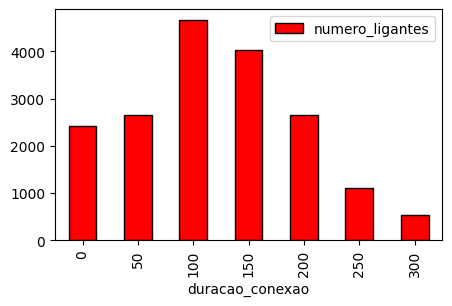

In [109]:
df_duracoes.plot(x="duracao_conexao",
                 y="numero_ligantes",
                 kind="bar",
                 figsize=(5,3),
                 color="red",
                 edgecolor="black")

,duracao_conexao,numero_ligantes,percentagem_relativa,percentagem_acumulada
0,0,2426,0.13,0.13
1,50,2648,0.15,0.28
2,100,4662,0.26,0.54
3,150,4032,0.22,0.76
4,200,2661,0.15,0.91
5,250,1113,0.06,0.97
6,300,527,0.03,1.00


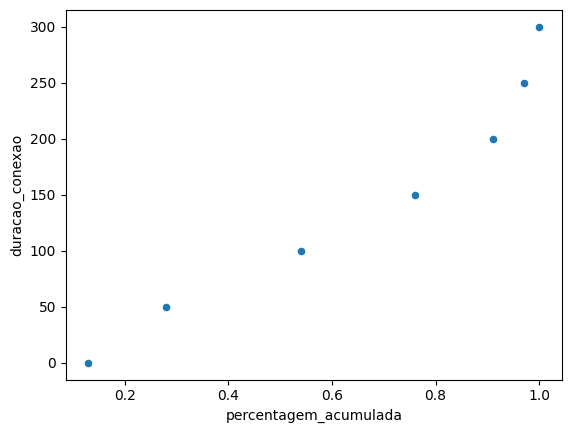

In [110]:
df_duracoes.plot(x="percentagem_acumulada",
                 y="duracao_conexao",
                 kind="scatter",
)
df_duracoes

In [120]:
coefs = metodo_minimos_quadrados.mmq(
    df_duracoes["percentagem_acumulada"],
    df_duracoes["duracao_conexao"],
    5
)
coefs

array([ 11131.87041447, -29751.83138627,  29914.73334044, -13895.78725445,
         3128.83146318,   -229.5626142 ])

In [121]:
x = np.linspace(0,1,1000) #gerando 1000 numeros igualmente espaçados entre 0 e 1.000
y = np.polyval(coefs, x) #Aplica um polinomio em cima desses dados

print(x[::100].round(1))
print(y[::100].round(1))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[-229.6  -28.5   35.7   52.3   65.6   88.8  116.8  140.1  158.   192.2]


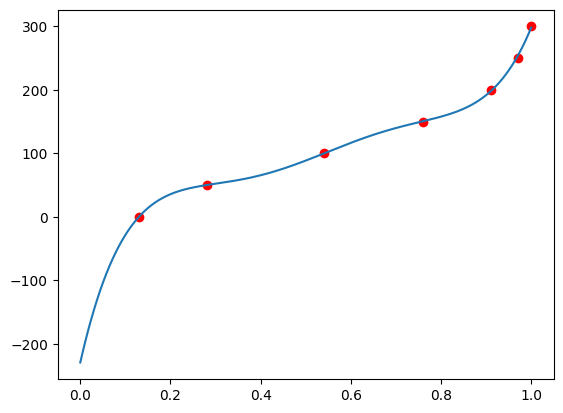

In [122]:
percentagens_acumuladas = df_duracoes["percentagem_acumulada"]
duracoes = df_duracoes["duracao_conexao"]

plt.scatter(percentagens_acumuladas, duracoes,
            color="red",
            label="Dados Originais")

plt.plot(x, y, label="Polinomio")
plt.show()

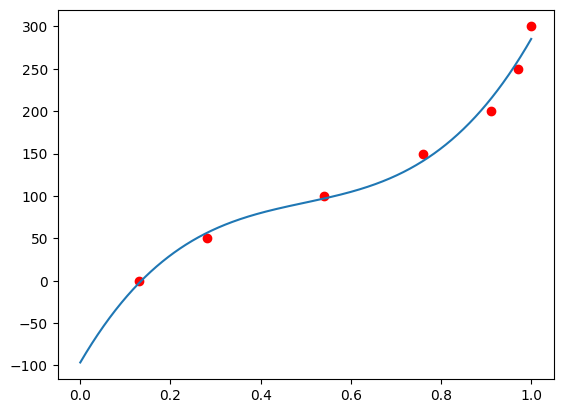

In [123]:
#Simulando mudana do coefs para grau 8 - fica claro que dá overfitting nos dados de treino/base

coefs = metodo_minimos_quadrados.mmq(
    df_duracoes["percentagem_acumulada"],
    df_duracoes["duracao_conexao"],
    3
)

x = np.linspace(0,1,1000) #gerando 1000 numeros igualmente espaçados entre 0 e 1.000
y = np.polyval(coefs, x) #Aplica um polinomio em cima desses dados

plt.scatter(percentagens_acumuladas, duracoes,
            color="red",
            label="Dados Originais")

plt.plot(x, y, label="Polinomio")
plt.show()

In [124]:
coefs = metodo_minimos_quadrados.mmq(
    df_duracoes["percentagem_acumulada"],
    df_duracoes["duracao_conexao"],
    5
)
coefs

array([ 11131.87041447, -29751.83138627,  29914.73334044, -13895.78725445,
         3128.83146318,   -229.5626142 ])

In [125]:
np.polyval(coefs, 0)

np.float64(-229.56261420319788)

In [126]:
np.polyval(coefs, [0, 0.1, 0.2, 0.3])

array([-229.5626142 ,  -28.58647152,   35.64932329,   52.22438292])

In [127]:
#Criando mil aleatorios para simular o tempo de chegada das ligações
tempos_aleatorios = []

for _ in range(10_000):
    alpha = np.random.random()
    tempo = np.polyval(coefs, alpha)
    tempos_aleatorios.append(tempo)

np.mean(tempos_aleatorios)

np.float64(85.86455158980421)

In [130]:
df_tabela_ligantes.loc[0]

Application                         Genesys Cloud
ApplicationVersion                            2.0
DnaAutomacao                                    0
AutomatedCall                                   0
Calldate                      2025-07-23 00:02:21
                                     ...         
RecentCallsSamePedido6Dias                      0
AfterHour                                       0
IdDivision                                      5
Hora                                     00:02:21
duracao_conexao                               150
Name: 0, Length: 74, dtype: object

In [ ]:
#exibindo numero medio ligantes da primeira linha (linha 0)
#PAREI AQUI - NAO TENHO A TABELA LIGANTES --> ALTERAR NOME DA TABELA_LIGANTES PARA DF_DURACOES
qtd_ligacoes = \
df_tabela_ligantes.loc[0, "numero_medio_ligantes"]
qtd_ligacoes

KeyError: 'numero_medio_ligantes'

In [132]:
np.random.seed(0)
momentos_ligacoes = np.random.randint(0, 900, size=qtd_ligacoes)
momentos_ligacoes[:10]

NameError: name 'qtd_ligacoes' is not defined

In [ ]:
df_duracoes.loc[0,"duracao_conexao"]

np.int64(0)

,duracao_conexao,numero_ligantes,percentagem_relativa,percentagem_acumulada
0,0,0,0.000,0.000
1,5,870,0.087,0.087
2,10,2210,0.221,0.308
3,15,2940,0.294,0.602
4,20,1710,0.171,0.773
5,25,1360,0.136,0.909
6,30,590,0.059,0.968
7,35,250,0.025,0.993
8,40,70,0.007,1.000


In [ ]:
momentos_ligacoes[:10]

array([ 0,  3,  4,  4,  7,  9, 11, 11, 13, 13], dtype=int32)

In [ ]:
momentos_ligacoes.sort()
momentos_ligacoes[:10]

array([ 0,  3,  4,  4,  7,  9, 11, 11, 13, 13], dtype=int32)

In [ ]:
#criando uma lista de dicionarios que vai conter os atendentes (inicio e fim de atendimento)
atendentes: list[dict] = []

In [ ]:
np.set_printoptions(legacy="1.13")

In [ ]:
momento_ligacao = momentos_ligacoes[0]
momento_ligacao

0

In [ ]:
#vamos sortear um aleatorio para simular o tempo que vai levar a primeira ligação
np.random.seed(0)
aleatorio = np.random.rand()
tempo_duracao = abs(np.polyval(coefs, aleatorio))
print(tempo_duracao)

14.9651548719


In [ ]:
#validando se a lista de atendentes está vazia e se estiver e tem ligação, cria uma atendente
if atendentes == []:
    atendente = {
        "inicio": momento_ligacao,
        "fim": momento_ligacao + tempo_duracao
    } 
    atendentes.append(atendente)

atendentes

[{'inicio': 0, 'fim': 14.965154871866302}]

In [ ]:
momento_ligacao = momentos_ligacoes[1]
momento_ligacao

3

In [ ]:
espera_maxima = 10
tempo_descanso = 0

In [ ]:
np.random.seed(1)
aleatorio = np.random.random()
tempo_duracao = abs(np.polyval(coefs, aleatorio))
tempo_duracao

11.718611910921702

In [ ]:
#alocando a ligação no atendente se ele estiver disponivel
for atendente in atendentes:
    fim = atendente["fim"] + tempo_descanso

    if momento_ligacao + espera_maxima < fim:
        ocupado = True
    else:
        ocupado = False

    if not ocupado:
        
        if momento_ligacao + espera_maxima > fim:
            atendente["inicio"] = momento_ligacao + espera_maxima
        else:
            atendente["inicio"] = fim

        atendente["fim"] = atendente["inicio"] + tempo_duracao
        break

#Esse else abaixo entra no caso de quando não bateu no break em nenhum momento (nesse caso, significa que todos atendente
#estao ocupados, entao precisa criar um novo;
else: 
    atendente = {
        "inicio": momento_ligacao,
        "fim": momento_ligacao + tempo_duracao
    }
    atendentes.append(atendente)
atendentes

[{'inicio': 0, 'fim': 14.965154871866302},
 {'inicio': 3, 'fim': 14.718611910921702}]

In [ ]:
momento_ligacao = momentos_ligacoes[2]
momento_ligacao

4

In [ ]:
np.random.seed(5)
espera_maxima = 10
tempo_descanso = 0
atendentes = []

for momento_ligacao in momentos_ligacoes:
    # print(momento_ligacao)
    aleatorio = np.random.rand()
    tempo_duracao = abs(np.polyval(coefs, aleatorio))

    #alocando a ligação no atendente se ele estiver disponivel
    for atendente in atendentes:
        fim = atendente["fim"] + tempo_descanso

        if momento_ligacao + espera_maxima < fim:
            ocupado = True
        else:
            ocupado = False

        if not ocupado:
            
            if momento_ligacao + espera_maxima > fim:
                atendente["inicio"] = momento_ligacao + espera_maxima
            else:
                atendente["inicio"] = fim

            atendente["fim"] = atendente["inicio"] + tempo_duracao
            break

    #Esse else abaixo entra no caso de quando não bateu no break em nenhum momento (nesse caso, significa que todos atendente
    #estao ocupados, entao precisa criar um novo;
    else: 
        atendente = {
            "inicio": momento_ligacao,
            "fim": momento_ligacao + tempo_duracao
        }
        atendentes.append(atendente)

atendentes

[{'inicio': 904, 'fim': 914.40375649914586},
 {'inicio': 906, 'fim': 917.86945228521722},
 {'inicio': 909, 'fim': 917.37356632891419},
 {'inicio': 900, 'fim': 912.04701461339766},
 {'inicio': 906, 'fim': 913.54143974666329},
 {'inicio': 906, 'fim': 909.2110175449709},
 {'inicio': 907, 'fim': 923.65667308860293},
 {'inicio': 898, 'fim': 910.8046881536053},
 {'inicio': 892, 'fim': 918.91345869819895},
 {'inicio': 892, 'fim': 899.69624954342305},
 {'inicio': 895, 'fim': 921.10612201694778},
 {'inicio': 894, 'fim': 924.6907424196321},
 {'inicio': 894, 'fim': 912.97138605835903},
 {'inicio': 895, 'fim': 911.50408246353663},
 {'inicio': 896, 'fim': 906.24103253314115},
 {'inicio': 896, 'fim': 913.60372670627521},
 {'inicio': 899, 'fim': 917.10414351614531},
 {'inicio': 899, 'fim': 928.75678692654105},
 {'inicio': 899, 'fim': 903.08006092176959},
 {'inicio': 899, 'fim': 906.40232584628484}]

In [ ]:
np.random.seed(5)
tempo_descanso = 0
espera_maxima = 10
atendentes = []
for momento_ligacao in momentos_ligacoes:
    aleatorio = np.random.random()
    tempo_duracao = abs(np.polyval(coefs, aleatorio))

    for atendente in atendentes:
        fim = atendente["fim"] + tempo_descanso

        if momento_ligacao + espera_maxima < fim:
            ocupado = True
        else:
            ocupado = False

        if not ocupado:

            if momento_ligacao + espera_maxima > fim:
                atendente["inicio"] = momento_ligacao + espera_maxima
            else:
                atendente["inicio"] = fim
            
            atendente["fim"] = atendente["inicio"] + tempo_duracao
            break
    else:

        atendente = {
            "inicio": momento_ligacao,
            "fim": momento_ligacao + tempo_duracao
        }
        atendentes.append(atendente)

atendentes

[{'inicio': 904, 'fim': 914.40375649914586},
 {'inicio': 906, 'fim': 917.86945228521722},
 {'inicio': 909, 'fim': 917.37356632891419},
 {'inicio': 900, 'fim': 912.04701461339766},
 {'inicio': 906, 'fim': 913.54143974666329},
 {'inicio': 906, 'fim': 909.2110175449709},
 {'inicio': 907, 'fim': 923.65667308860293},
 {'inicio': 898, 'fim': 910.8046881536053},
 {'inicio': 892, 'fim': 918.91345869819895},
 {'inicio': 892, 'fim': 899.69624954342305},
 {'inicio': 895, 'fim': 921.10612201694778},
 {'inicio': 894, 'fim': 924.6907424196321},
 {'inicio': 894, 'fim': 912.97138605835903},
 {'inicio': 895, 'fim': 911.50408246353663},
 {'inicio': 896, 'fim': 906.24103253314115},
 {'inicio': 896, 'fim': 913.60372670627521},
 {'inicio': 899, 'fim': 917.10414351614531},
 {'inicio': 899, 'fim': 928.75678692654105},
 {'inicio': 899, 'fim': 903.08006092176959},
 {'inicio': 899, 'fim': 906.40232584628484}]

In [ ]:
len(atendentes)

20

In [ ]:
#Para evitar que o primeiro atendente seja sempre o primeiro a ser alocado, é necessário embaralhar a ordem dos atendentes 
# para alocar as ligações depois
np.random.permutation([1,2,3,4,5,6,7,8])

array([2, 1, 5, 4, 8, 6, 3, 7])

In [ ]:
np.random.seed(5)
tempo_descanso = 0
espera_maxima = 10
atendentes = []

for momento_ligacao in momentos_ligacoes:
    aleatorio = np.random.random()
    tempo_duracao = abs(np.polyval(coefs, aleatorio))

    atendentes = list(np.random.permutation(atendentes))

    for atendente in atendentes:
        fim = atendente["fim"] + tempo_descanso

        if momento_ligacao + espera_maxima < fim:
            ocupado = True
        else:
            ocupado = False

        if not ocupado:

            if momento_ligacao + espera_maxima > fim:
                atendente["inicio"] = momento_ligacao + espera_maxima
            else:
                atendente["inicio"] = fim
            
            atendente["fim"] = atendente["inicio"] + tempo_duracao
            break
    else:

        atendente = {
            "inicio": momento_ligacao,
            "fim": momento_ligacao + tempo_duracao
        }
        atendentes.append(atendente)

atendentes

[{'inicio': 899, 'fim': 909.29559843894401},
 {'inicio': 900, 'fim': 910.8933443095973},
 {'inicio': 899, 'fim': 932.21236758365058},
 {'inicio': 909, 'fim': 917.53861755832725},
 {'inicio': 904, 'fim': 920.23396462394362},
 {'inicio': 899, 'fim': 908.85265704367271},
 {'inicio': 867, 'fim': 894.99620690112238},
 {'inicio': 901, 'fim': 917.6665794080742},
 {'inicio': 907, 'fim': 915.17518229744098},
 {'inicio': 906, 'fim': 913.65133331325376},
 {'inicio': 896, 'fim': 906.82228408336164},
 {'inicio': 892, 'fim': 907.66966276223832},
 {'inicio': 882, 'fim': 901.13837906628623},
 {'inicio': 883, 'fim': 902.83508527519712},
 {'inicio': 814, 'fim': 843.61932084942623},
 {'inicio': 899, 'fim': 907.73089614730179},
 {'inicio': 896, 'fim': 912.80887287288704},
 {'inicio': 906, 'fim': 930.7765085877561},
 {'inicio': 906, 'fim': 914.04967842284293}]

In [ ]:
len(atendentes)

19

In [ ]:
df_tabela_ligantes

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes
0,1,00:00:00,00:15:00,601
1,2,00:15:00,00:30:00,190
2,3,00:30:00,00:45:00,180
3,4,00:45:00,01:00:00,177
4,5,01:00:00,01:15:00,162
...,...,...,...,...
91,92,22:45:00,23:00:00,920
92,93,23:00:00,23:15:00,897
93,94,23:15:00,23:30:00,571
94,95,23:30:00,23:45:00,560


In [ ]:
np.random.seed(5)
tempo_descanso = 0
espera_maxima = 10
coluna_nan = []

for i, linha in df_tabela_ligantes.iterrows():
    qtd_ligacoes = linha["numero_medio_ligantes"]

    momentos_ligacoes = np.random.randint(0, 900, size=qtd_ligacoes)
    momentos_ligacoes.sort()

    atendentes = []
    for momento_ligacao in momentos_ligacoes:
        aleatorio = np.random.random()
        tempo_duracao = abs(np.polyval(coefs, aleatorio))

        atendentes = list(np.random.permutation(atendentes))

        for atendente in atendentes:
            fim = atendente["fim"] + tempo_descanso

            if momento_ligacao + espera_maxima < fim:
                ocupado = True
            else:
                ocupado = False

            if not ocupado:

                if momento_ligacao + espera_maxima > fim:
                    atendente["inicio"] = momento_ligacao + espera_maxima
                else:
                    atendente["inicio"] = fim
                
                atendente["fim"] = atendente["inicio"] + tempo_duracao
                break
        else:

            atendente = {
                "inicio": momento_ligacao,
                "fim": momento_ligacao + tempo_duracao
            }
            atendentes.append(atendente)
    
    nan = len(atendentes)
    coluna_nan.append(nan)

coluna_nan

[20,
 9,
 8,
 9,
 8,
 5,
 6,
 7,
 5,
 5,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 3,
 4,
 6,
 6,
 8,
 7,
 20,
 21,
 23,
 23,
 41,
 41,
 41,
 45,
 66,
 59,
 60,
 67,
 70,
 75,
 71,
 75,
 66,
 64,
 62,
 68,
 57,
 57,
 56,
 60,
 64,
 67,
 63,
 70,
 69,
 67,
 64,
 66,
 71,
 66,
 70,
 67,
 68,
 66,
 68,
 71,
 68,
 69,
 73,
 62,
 55,
 51,
 52,
 48,
 45,
 44,
 39,
 38,
 41,
 36,
 36,
 40,
 36,
 34,
 30,
 31,
 31,
 26,
 26,
 26,
 23,
 18,
 18,
 18]

In [ ]:
df_tabela_ligantes["nan"] = coluna_nan
df_tabela_ligantes

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes,nan
0,1,00:00:00,00:15:00,601,20
1,2,00:15:00,00:30:00,190,9
2,3,00:30:00,00:45:00,180,8
3,4,00:45:00,01:00:00,177,9
4,5,01:00:00,01:15:00,162,8
...,...,...,...,...,...
91,92,22:45:00,23:00:00,920,26
92,93,23:00:00,23:15:00,897,23
93,94,23:15:00,23:30:00,571,18
94,95,23:30:00,23:45:00,560,18


---
# Attentus

In [ ]:
import pulp as plp

In [ ]:
df_nan = df_tabela_ligantes.copy()
df_nan

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes,nan
0,1,00:00:00,00:15:00,601,20
1,2,00:15:00,00:30:00,190,9
2,3,00:30:00,00:45:00,180,8
3,4,00:45:00,01:00:00,177,9
4,5,01:00:00,01:15:00,162,8
...,...,...,...,...,...
91,92,22:45:00,23:00:00,920,26
92,93,23:00:00,23:15:00,897,23
93,94,23:15:00,23:30:00,571,18
94,95,23:30:00,23:45:00,560,18


In [ ]:
df_nad = pd.read_excel(
    os.path.join("data", "nad.xlsx")
)
df_nad

,regime,nad,enc
0,3h,200,540
1,4h,200,680
2,6h,200,960


In [ ]:
from itertools import product

In [ ]:
regimes = df_nad["regime"].to_dict()
regimes

{0: '3h', 1: '4h', 2: '6h'}

In [ ]:
inicios = df_nan["hora_inicio"].to_dict()
inicios

{0: datetime.time(0, 0),
 1: datetime.time(0, 15),
 2: datetime.time(0, 30),
 3: datetime.time(0, 45),
 4: datetime.time(1, 0),
 5: datetime.time(1, 15),
 6: datetime.time(1, 30),
 7: datetime.time(1, 45),
 8: datetime.time(2, 0),
 9: datetime.time(2, 15),
 10: datetime.time(2, 30),
 11: datetime.time(2, 45),
 12: datetime.time(3, 0),
 13: datetime.time(3, 15),
 14: datetime.time(3, 30),
 15: datetime.time(3, 45),
 16: datetime.time(4, 0),
 17: datetime.time(4, 15),
 18: datetime.time(4, 30),
 19: datetime.time(4, 45),
 20: datetime.time(5, 0),
 21: datetime.time(5, 15),
 22: datetime.time(5, 30),
 23: datetime.time(5, 45),
 24: datetime.time(6, 0),
 25: datetime.time(6, 15),
 26: datetime.time(6, 30),
 27: datetime.time(6, 45),
 28: datetime.time(7, 0),
 29: datetime.time(7, 15),
 30: datetime.time(7, 30),
 31: datetime.time(7, 45),
 32: datetime.time(8, 0),
 33: datetime.time(8, 15),
 34: datetime.time(8, 30),
 35: datetime.time(8, 45),
 36: datetime.time(9, 0),
 37: datetime.time(9,

In [ ]:
lista_variaveis = list(product(regimes, inicios))
lista_variaveis

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (0, 42),
 (0, 43),
 (0, 44),
 (0, 45),
 (0, 46),
 (0, 47),
 (0, 48),
 (0, 49),
 (0, 50),
 (0, 51),
 (0, 52),
 (0, 53),
 (0, 54),
 (0, 55),
 (0, 56),
 (0, 57),
 (0, 58),
 (0, 59),
 (0, 60),
 (0, 61),
 (0, 62),
 (0, 63),
 (0, 64),
 (0, 65),
 (0, 66),
 (0, 67),
 (0, 68),
 (0, 69),
 (0, 70),
 (0, 71),
 (0, 72),
 (0, 73),
 (0, 74),
 (0, 75),
 (0, 76),
 (0, 77),
 (0, 78),
 (0, 79),
 (0, 80),
 (0, 81),
 (0, 82),
 (0, 83),
 (0, 84),
 (0, 85),
 (0, 86),
 (0, 87),
 (0, 88),
 (0, 89),
 (0, 90),
 (0, 91),
 (0, 92),
 (0, 93),
 (0, 94),
 (0, 95),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 

In [ ]:
prob = plp.LpProblem(
    name="Attentus", sense=plp.LpMinimize
)
prob

Attentus:
MINIMIZE
None
VARIABLES

In [ ]:
pulp_variaveis = plp.LpVariable.dicts(
    "A", lista_variaveis, lowBound=0, cat=plp.LpInteger
)
pulp_variaveis

{(0, 0): A_(0,_0),
 (0, 1): A_(0,_1),
 (0, 2): A_(0,_2),
 (0, 3): A_(0,_3),
 (0, 4): A_(0,_4),
 (0, 5): A_(0,_5),
 (0, 6): A_(0,_6),
 (0, 7): A_(0,_7),
 (0, 8): A_(0,_8),
 (0, 9): A_(0,_9),
 (0, 10): A_(0,_10),
 (0, 11): A_(0,_11),
 (0, 12): A_(0,_12),
 (0, 13): A_(0,_13),
 (0, 14): A_(0,_14),
 (0, 15): A_(0,_15),
 (0, 16): A_(0,_16),
 (0, 17): A_(0,_17),
 (0, 18): A_(0,_18),
 (0, 19): A_(0,_19),
 (0, 20): A_(0,_20),
 (0, 21): A_(0,_21),
 (0, 22): A_(0,_22),
 (0, 23): A_(0,_23),
 (0, 24): A_(0,_24),
 (0, 25): A_(0,_25),
 (0, 26): A_(0,_26),
 (0, 27): A_(0,_27),
 (0, 28): A_(0,_28),
 (0, 29): A_(0,_29),
 (0, 30): A_(0,_30),
 (0, 31): A_(0,_31),
 (0, 32): A_(0,_32),
 (0, 33): A_(0,_33),
 (0, 34): A_(0,_34),
 (0, 35): A_(0,_35),
 (0, 36): A_(0,_36),
 (0, 37): A_(0,_37),
 (0, 38): A_(0,_38),
 (0, 39): A_(0,_39),
 (0, 40): A_(0,_40),
 (0, 41): A_(0,_41),
 (0, 42): A_(0,_42),
 (0, 43): A_(0,_43),
 (0, 44): A_(0,_44),
 (0, 45): A_(0,_45),
 (0, 46): A_(0,_46),
 (0, 47): A_(0,_47),
 (0, 48): A_

In [ ]:
coeficientes = []
for indice_regime, indice_periodo in lista_variaveis:
    encargo = df_nad.loc[indice_regime, "enc"]
    coeficientes.append(encargo)
print(coeficientes[::10])

[540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 680, 680, 680, 680, 680, 680, 680, 680, 680, 680, 960, 960, 960, 960, 960, 960, 960, 960, 960]


In [ ]:
#criando função objetivo
fo = plp.lpSum(
    [coef * pulp_variaveis[var] 
     for coef, var in zip(coeficientes, lista_variaveis)]
)

#cadastrando função objetivo no problema
prob+= fo, "custo"
prob

Attentus:
MINIMIZE
540*A_(0,_0) + 540*A_(0,_1) + 540*A_(0,_10) + 540*A_(0,_11) + 540*A_(0,_12) + 540*A_(0,_13) + 540*A_(0,_14) + 540*A_(0,_15) + 540*A_(0,_16) + 540*A_(0,_17) + 540*A_(0,_18) + 540*A_(0,_19) + 540*A_(0,_2) + 540*A_(0,_20) + 540*A_(0,_21) + 540*A_(0,_22) + 540*A_(0,_23) + 540*A_(0,_24) + 540*A_(0,_25) + 540*A_(0,_26) + 540*A_(0,_27) + 540*A_(0,_28) + 540*A_(0,_29) + 540*A_(0,_3) + 540*A_(0,_30) + 540*A_(0,_31) + 540*A_(0,_32) + 540*A_(0,_33) + 540*A_(0,_34) + 540*A_(0,_35) + 540*A_(0,_36) + 540*A_(0,_37) + 540*A_(0,_38) + 540*A_(0,_39) + 540*A_(0,_4) + 540*A_(0,_40) + 540*A_(0,_41) + 540*A_(0,_42) + 540*A_(0,_43) + 540*A_(0,_44) + 540*A_(0,_45) + 540*A_(0,_46) + 540*A_(0,_47) + 540*A_(0,_48) + 540*A_(0,_49) + 540*A_(0,_5) + 540*A_(0,_50) + 540*A_(0,_51) + 540*A_(0,_52) + 540*A_(0,_53) + 540*A_(0,_54) + 540*A_(0,_55) + 540*A_(0,_56) + 540*A_(0,_57) + 540*A_(0,_58) + 540*A_(0,_59) + 540*A_(0,_6) + 540*A_(0,_60) + 540*A_(0,_61) + 540*A_(0,_62) + 540*A_(0,_63) + 540*A_(0,_64